# Time Series Regression for Total Number of Liquidated Firms in Turkey

Ümit Barış Gökkaya - 12.01.2021

## 1. Introduction

Every month, hundreds of firms are closed ("liquidated") and new ones are opened. Even though most of the liqudations are due to financial reasons; government policies, national and international crises, such as the COVID-19 pandemic, may boost the number of firms going down.

In this study, monthly total number of liquidated firms in Turkey will be analysed in a time series perspective. Various different macroeconomic indicators will be used as predictors as to find out whether they are effective at prediction.

## 2. Analysis

All data used in this analysis is from Central Bank of Turkey's Data Center [EVDS](https://evds2.tcmb.gov.tr/). Statsmodels package and its tools will be used for regression and seaborn library will be used to visualize relevant data. All data available in EVDS (from 2012 up to November 2020) will be used. 

Throughout this analysis, regressors will be chosen on a trial-error basis. Main criteria is the residual standard error but also the adjusted R-square value will be used. 

To start, some common predictors are read with the main data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_breusch_godfrey as bgtest
import warnings
warnings.filterwarnings('ignore')

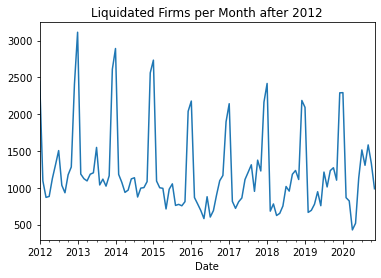

In [2]:
df = pd.read_excel("hw3.xlsx", index_col="Date", parse_dates=True)
df.liquidated.plot(title="Liquidated Firms per Month after 2012");

Strong seasonality of the data can easily be seen. To incorporate this into the model, months are added as categorical variables.

Most likely due to accounting customs, January and December of every year see a sharp increase.

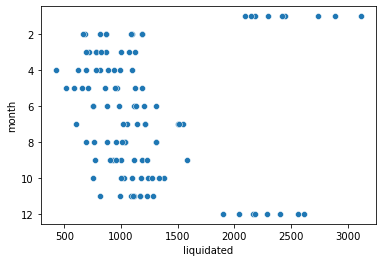

In [3]:
df["month"] = df.index.month.astype("category")
sns.scatterplot(y="month", x="liquidated", data=df);

In [4]:
df.tail()

,liquidated,unemployment,production,USDTRY,interest,cci,economic_situ,established,month
Date,,,,,,,,,
2020-07-01,1514,13.4,119.572899,6.851095,10.3040,82.822472,73.789571,10394,7
2020-08-01,1305,13.2,115.158316,7.252190,12.8500,79.771823,68.616596,9496,8
2020-09-01,1582,12.7,133.218123,7.507782,14.2850,81.908157,71.919256,10764,9
2020-10-01,1331,12.7,134.939283,7.873881,15.2320,81.543351,66.256658,10419,10
2020-11-01,986,12.7,131.535818,8.003324,17.1875,79.984111,61.078587,8782,11


Following 7 different independent variables are imported with the main data:  
- production: Total Industry Production Index in Turkey. 2015 is set to 100.
- USDTRY: US Dollars to Turkish Liras exchange rate
- unemployment: Unemployment rate of the Turkish workforce
- interest: Average interest rate applied by banks to commercial loans
- cci: Consumer Confidence Index, confidence of Turkish public to the economy, survey-based
- economic_situ: General Economic Situation in Turkey, compared to last 12 months, survey-based
- established: Monthly newly established firms in Turkey

First linear regression model is built using only seasonality.

                            OLS Regression Results                            
Dep. Variable:             liquidated   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     48.98
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           2.99e-34
Time:                        14:04:34   Log-Likelihood:                -728.05
No. Observations:                 107   AIC:                             1480.
Df Residuals:                      95   BIC:                             1512.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month[1]    2478.7778     77.181     32.117      0.0

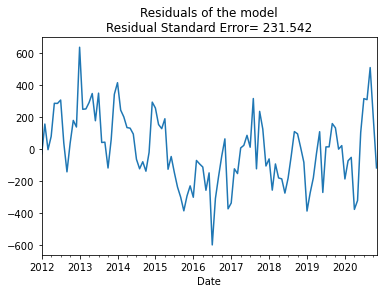

In [5]:
model = ols(formula="liquidated ~ 0 + month", data=df).fit()
print(model.summary())
model.resid.plot(title="Residuals of the model\nResidual Standard Error= {:.3f}".format(model.scale ** 0.5));

With the RSE score of 231.5 in mind, let's try different predictors and look at their effects.

Most obvious one seems to be the monthly interest rate on bank loans: with less interest, firms can utilize more loans to "save" themselves.

                            OLS Regression Results                            
Dep. Variable:             liquidated   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     47.19
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           2.00e-34
Time:                        14:04:34   Log-Likelihood:                -725.30
No. Observations:                 107   AIC:                             1477.
Df Residuals:                      94   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month[1]    2631.2048    101.974     25.803      0.0

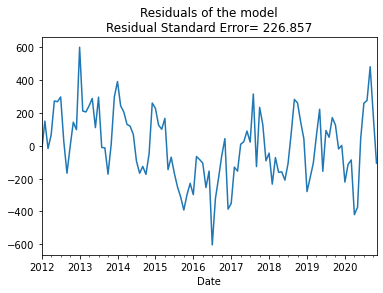

In [6]:
model = ols(formula="liquidated ~ 0 + month + interest", data=df).fit()
print(model.summary())
model.resid.plot(title="Residuals of the model\nResidual Standard Error= {:.3f}".format(model.scale ** 0.5));

As thought before, adding interest rate to the model decreases the RSE value.

Another significant predictor can be the number of monthly established firms. It is obvious that with more firms established, more will be liquidated.

                            OLS Regression Results                            
Dep. Variable:             liquidated   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     43.42
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           1.05e-33
Time:                        14:04:35   Log-Likelihood:                -724.95
No. Observations:                 107   AIC:                             1478.
Df Residuals:                      93   BIC:                             1515.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
month[1]     2577.6825    123.337     20.900      

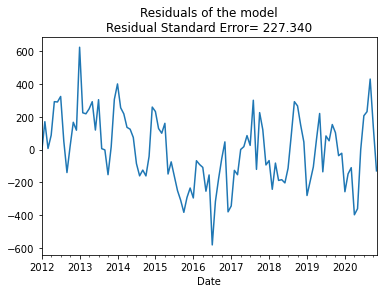

In [7]:
model = ols(formula="liquidated ~ 0 + month + interest + established", data=df).fit()
print(model.summary())
model.resid.plot(title="Residuals of the model\nResidual Standard Error= {:.3f}".format(model.scale ** 0.5));

However, number of newly established firms is not significant to the model and it makes it worse off. So it is omitted.

After trying out the remaining 5 predictors, it seems that only the interest and unemployment rates can predict the liquidated firms. Some predictors like the Consumer Confidence Index, worsen the model further.

                            OLS Regression Results                            
Dep. Variable:             liquidated   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     45.68
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           1.43e-34
Time:                        14:04:35   Log-Likelihood:                -722.62
No. Observations:                 107   AIC:                             1473.
Df Residuals:                      93   BIC:                             1511.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
month[1]      2916.9015    164.499     17.732   

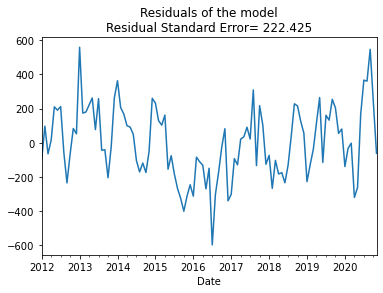

In [8]:
model = ols(formula="liquidated ~ 0 + month + interest + unemployment", data=df).fit()
print(model.summary())
model.resid.plot(title="Residuals of the model\nResidual Standard Error= {:.3f}".format(model.scale ** 0.5));

Before trying out other predictors, it can be beneficial to look deeper into the residuals and their correlation.  

Breusch–Godfrey Test p-value: 0.000


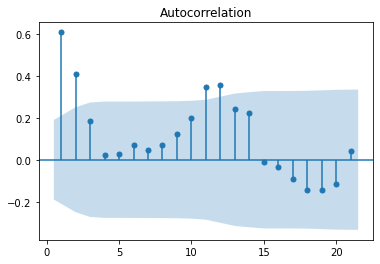

In [9]:
print("Breusch–Godfrey Test p-value: {:.3f}".format(bgtest(model)[1]))
plot_acf(model.resid, zero=False, unbiased=True);

Though the residuals seem to be random enough, Breusch-Godfrey test result does not agree with that.  
Autocorrelation function show significant correlation at lag 1.  
So the 1 month lagged values are added as a column and into the model.

In [10]:
df["lag1"] = df.liquidated.shift(1)

                            OLS Regression Results                            
Dep. Variable:             liquidated   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     65.09
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           4.29e-41
Time:                        14:04:36   Log-Likelihood:                -692.74
No. Observations:                 106   AIC:                             1415.
Df Residuals:                      91   BIC:                             1455.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
month[1]      1277.0724    271.091      4.711   

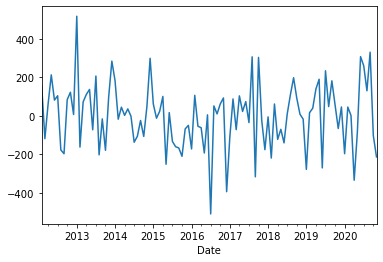

In [11]:
model = ols(formula="liquidated ~ 0 + month + interest + unemployment + lag1", data=df).fit()
print(model.summary())
print("\n\nResidual Standard Error: {:.3f}".format(model.scale ** 0.5))
model.resid.plot();

It seems that the best predictor for our data is last month's data. Visually, residuals are much more random than previous example.  
Additionally, interest rate and unemployment rate seem to lose their significance. Omitting at least one of them may result in a better model.

                            OLS Regression Results                            
Dep. Variable:             liquidated   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     70.33
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           6.81e-42
Time:                        14:04:37   Log-Likelihood:                -693.10
No. Observations:                 106   AIC:                             1414.
Df Residuals:                      92   BIC:                             1451.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month[1]    1144.3495    212.825      5.377      0.0

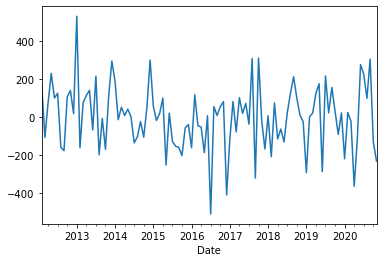

In [12]:
model = ols(formula="liquidated ~ 0 + month + interest + lag1", data=df).fit()
print(model.summary())
print("\n\nResidual Standard Error: {:.3f}".format(model.scale ** 0.5))
model.resid.plot();

0.11244854519968148


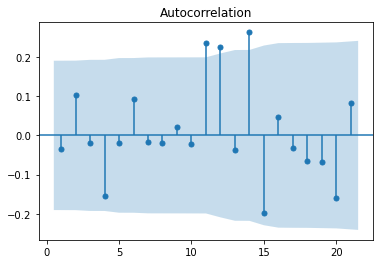

In [13]:
print(bgtest(model)[1])
plot_acf(model.resid, zero=False, unbiased=True);

Significant serial correlation between residuals seems to be decreased after adding the lagged values.  
Looking at the EVDS website, two new measures are imported to test:
- Industrial Capacity Usage Ratio
- Producer Price Index and resulting Inflation

In [14]:
ppi = pd.read_excel("ufe.xlsx", parse_dates=True, index_col="Date")
df["inflation"] = ppi.pct_change(12).loc["2012":"2020-11"]

capacity = pd.read_excel("capacity.xlsx", parse_dates=True, index_col="Date")
df["capacity"] = capacity.loc["2012":"2020-11"]

df.head()

,liquidated,unemployment,production,USDTRY,interest,cci,economic_situ,established,month,lag1,inflation,capacity
Date,,,,,,,,,,,,
2012-01-01,2449,9.3,74.975036,1.838936,15.2975,92.499305,98.085568,5328,1,NaN,0.111322,75.7
2012-02-01,1094,9.6,73.394120,1.751090,14.8650,93.800517,99.959481,3894,2,2449.0,0.091481,74.1
2012-03-01,869,9.1,83.766833,1.779295,14.1840,93.186020,100.556749,3663,3,1094.0,0.082219,74.6
2012-04-01,882,8.2,80.298055,1.779840,14.1825,88.707608,94.290142,3272,4,869.0,0.076541,77.6
2012-05-01,1123,7.6,86.812208,1.796955,14.0475,91.934737,99.401858,3250,5,882.0,0.080604,76.7


                            OLS Regression Results                            
Dep. Variable:             liquidated   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     64.63
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           5.71e-41
Time:                        14:04:38   Log-Likelihood:                -693.08
No. Observations:                 106   AIC:                             1416.
Df Residuals:                      91   BIC:                             1456.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month[1]    1250.5009    544.201      2.298      0.0

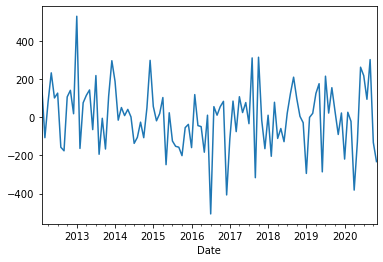

In [15]:
model1 = ols(formula="liquidated ~ 0 + month + interest + lag1 + capacity", data=df).fit()
print(model1.summary())
print("\n\nResidual Standard Error: {:.3f}".format(model1.scale ** 0.5))
model1.resid.plot();

Neither the capacity usage ratio nor the inflation result in a better model, without further diving into cross-correlation and seasonal decomposition, the model with months, lag 1 and interest rate is the best one at hand.

## 3. Conclusion  
Looking at the fitted values versus original data may show where the model lacks most 

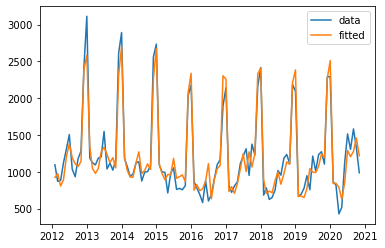

In [16]:
plt.plot(df.liquidated[1:], label="data")
plt.plot(model.fittedvalues, label="fitted")
plt.legend();

The model seems to be bad at predicting dips. However some of those dips are results of force majeure: The one in first half of 2020 is because of the Covid-19 and resulting shutdowns of government offices. Also due to Covid-19, fitted values seem to stay below our data in the second half. Some of those firms may be the ones that could not liquidate due to shutdowns and some may be the ones that liquidated due to the economic crisis caused by Covid-19. Omitting 2020 can result in a better model. However, since main goal is to predict December 2020, that is not possible.

To predict December's value, the interest rate is looked up on the EVDS website and it is 18.97%.

In [17]:
prediction = model.predict({"interest": 18.97, "month": 12, 
                            "lag1": df.loc["2020-11"].liquidated[0]})
print("Liquidated Firms in December 2020: " + str(int(prediction[0])))

Liquidated Firms in December 2020: 2171


The model expects 2171 firms to be closed during December and this value will be compared to the real data once EVDS is updated.

## 4. References

Source for the data: [EVDS](evds2.tcmb.gov.tr)

Jupyter Notebook for this analysis: [IE 360 Homework 3](ie360_hw3.ipynb)

Excel Files used in this analysis: [Liquidated Firms and others](hw3.xlsx), [Producer Price Index](ppi.xlsx), [Capacity Usage Rate](capacity.xlsx)